In [1]:
# Importing necessary libaries

import pandas as pd
import numpy as np
import julian
import datetime

import warnings
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

import re

import h3
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

# Loading data

In [3]:
df_fires_rare=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/df_fires_rare_model1.csv")
df_fires_rare.drop(["Unnamed: 0"],axis=1, inplace=True)



In [4]:
df_final_model1=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/df_final_model_step1.csv")
df_final_model1.drop(["Unnamed: 0"],axis=1, inplace=True)

In [5]:
#df_fires_rare

In [6]:
#df_final_model1

In [7]:
df_fires=df_final_model1[df_final_model1["index_fires"].isna()==False]
df_fires

,date,h3_level_4,fire_date,cause_id,fire_size,avgTemp,avgPerc,avgWind,index_fires,month,q_avg_temp,y_avg_temp,q_sum_perc,urban_areas,lat,lng
30,2003-01-01,8429a51ffffffff,1,13.0,2.0,35.01140,6.100000,1.925,145751.0,1,34.550000,34.550000,162.300000,0,33.363745,-118.424787
70,2006-07-01,8429a51ffffffff,1,1.0,3.0,36.34520,0.000000,2.425,145767.0,7,36.088700,36.088700,0.000000,0,33.363745,-118.424787
134,2012-03-01,8429a51ffffffff,1,2.0,1.0,34.18340,25.100000,2.650,157655.0,3,34.410200,34.410200,96.200000,0,33.363745,-118.424787
246,1997-08-01,8429a43ffffffff,1,9.0,1.0,35.88560,0.000000,2.700,130262.0,8,35.804400,35.804400,22.000000,0,33.144796,-117.576960
380,2008-10-01,8429a43ffffffff,1,13.0,3.0,35.41460,0.850000,2.000,64852.0,10,34.859800,34.859800,125.058333,0,33.144796,-117.576960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108355,2015-09-01,8428325ffffffff,1,7.0,1.0,35.42495,0.433333,2.600,176141.0,9,35.714667,35.714667,323.366667,0,38.935185,-120.487990
2108356,2015-09-01,8428325ffffffff,1,7.0,1.0,35.42495,0.433333,2.600,178932.0,9,35.714667,35.714667,323.366667,0,38.935185,-120.487990
2108357,2015-09-01,8428325ffffffff,1,7.0,1.0,35.42495,0.433333,2.600,178952.0,9,35.714667,35.714667,323.366667,0,38.935185,-120.487990
2108358,2015-09-01,8428325ffffffff,1,7.0,1.0,35.42495,0.433333,2.600,179846.0,9,35.714667,35.714667,323.366667,0,38.935185,-120.487990


In [8]:
df_fires.isna().sum()

date           0
h3_level_4     0
fire_date      0
cause_id       0
fire_size      0
avgTemp        0
avgPerc        0
avgWind        0
index_fires    0
month          0
q_avg_temp     0
y_avg_temp     0
q_sum_perc     0
urban_areas    0
lat            0
lng            0
dtype: int64

In [9]:
df_fires["index_fires"]=df_fires["index_fires"].apply(lambda x: int(x))

In [10]:
df_fires=df_fires.set_index('index_fires')

# Trimming on data > 2000

In [11]:
df_fires_2000=df_fires[df_fires["date"]>"1999-01-12"]
df_fires_2000

,date,h3_level_4,fire_date,cause_id,fire_size,avgTemp,avgPerc,avgWind,month,q_avg_temp,y_avg_temp,q_sum_perc,urban_areas,lat,lng
index_fires,,,,,,,,,,,,,,,
145751,2003-01-01,8429a51ffffffff,1,13.0,2.0,35.01140,6.100000,1.925000,1,34.550000,34.550000,162.300000,0,33.363745,-118.424787
145767,2006-07-01,8429a51ffffffff,1,1.0,3.0,36.34520,0.000000,2.425000,7,36.088700,36.088700,0.000000,0,33.363745,-118.424787
157655,2012-03-01,8429a51ffffffff,1,2.0,1.0,34.18340,25.100000,2.650000,3,34.410200,34.410200,96.200000,0,33.363745,-118.424787
64852,2008-10-01,8429a43ffffffff,1,13.0,3.0,35.41460,0.850000,2.000000,10,34.859800,34.859800,125.058333,0,33.144796,-117.576960
145704,2010-07-01,8429a43ffffffff,1,13.0,3.0,35.38850,1.825000,2.277778,7,35.369600,35.369600,8.858333,0,33.144796,-117.576960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176141,2015-09-01,8428325ffffffff,1,7.0,1.0,35.42495,0.433333,2.600000,9,35.714667,35.714667,323.366667,0,38.935185,-120.487990
178932,2015-09-01,8428325ffffffff,1,7.0,1.0,35.42495,0.433333,2.600000,9,35.714667,35.714667,323.366667,0,38.935185,-120.487990
178952,2015-09-01,8428325ffffffff,1,7.0,1.0,35.42495,0.433333,2.600000,9,35.714667,35.714667,323.366667,0,38.935185,-120.487990


1.0    1324287
2.0      77901
3.0      10865
4.0       2696
Name: fire_size, dtype: int64


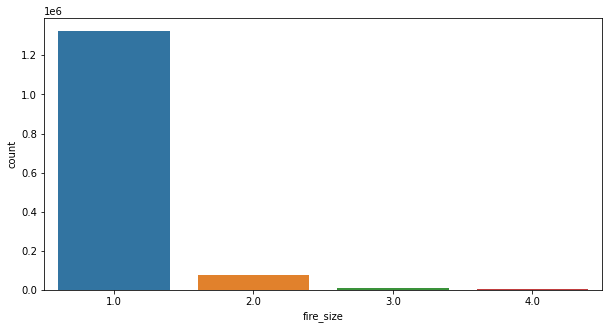

In [12]:
print(df_fires_2000["fire_size"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x="fire_size", data=df_fires_2000)
plt.show()

# Target variable fire size class

In [13]:
df=pd.read_csv("/Users/carolinvogt/Becoming_Data_Analyst/final_project/wildfire_project/wildfires_CA.csv")
df.drop(["Unnamed: 0"],axis=1, inplace=True)

In [14]:
#only california
df.drop(["STATE"],axis=1, inplace=True)

In [15]:
size_classes=sorted(list(df["FIRE_SIZE_CLASS"].unique()))
size_classes

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [16]:
df_fires_2000["fire_size"]=df["FIRE_SIZE_CLASS"]

A    718101
B    606186
C     64670
D     13231
E      6465
F      4400
G      2696
Name: fire_size, dtype: int64


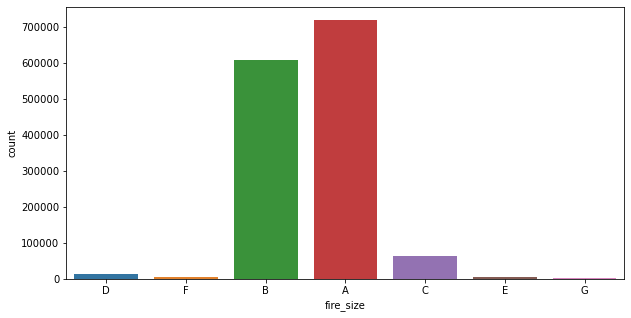

In [17]:
print(df_fires_2000["fire_size"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x="fire_size", data=df_fires_2000)
plt.show()

In [18]:
df_fires["fire_size"]=df["FIRE_SIZE_CLASS"]

A    1038644
B     909043
C     103919
D      21540
E      11839
F       7174
G       3283
Name: fire_size, dtype: int64


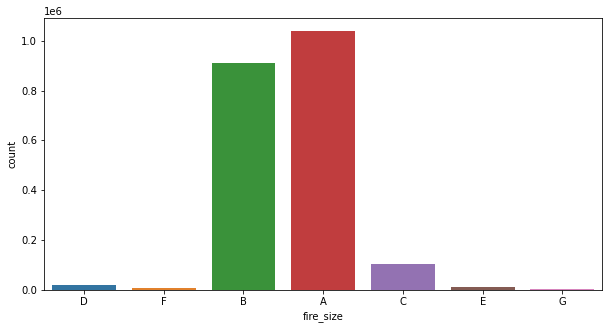

In [19]:
print(df_fires["fire_size"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x="fire_size", data=df_fires)
plt.show()

In [20]:
fire_size_dic={'A': 1, 'B': 1, 'C': 1, 'D': 2, 'E': 3, 'F':3 , 'G': 3}

In [21]:
df_fires["fire_size"]=df_fires["fire_size"].apply(lambda x: fire_size_dic[x])

1    2051606
3      22296
2      21540
Name: fire_size, dtype: int64


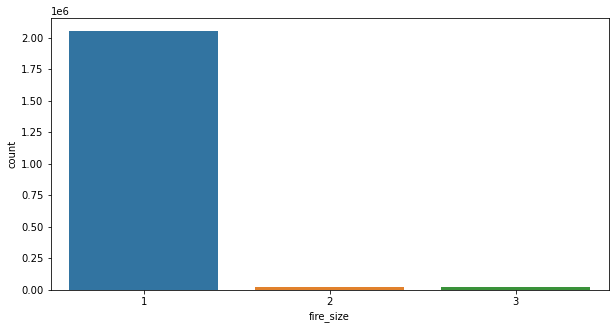

In [22]:
print(df_fires["fire_size"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x="fire_size", data=df_fires)
plt.show()

In [23]:
test_1=df_fires[df_fires["fire_size"]==1].sample(22296,replace=False)
test_3=df_fires[df_fires["fire_size"]==2]
test_4=df_fires[df_fires["fire_size"]==3].sample(22296,replace=True)

df_bal=pd.concat([test_1,test_3,test_4],axis=0)

In [24]:
df_bal['date'] = pd.to_datetime(df_bal['date'])
df_bal['weekday'] = df_bal['date'].apply(lambda x: x.dayofweek) #already numeric

df_bal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66132 entries, 7946 to 170366
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         66132 non-null  datetime64[ns]
 1   h3_level_4   66132 non-null  object        
 2   fire_date    66132 non-null  int64         
 3   cause_id     66132 non-null  float64       
 4   fire_size    66132 non-null  int64         
 5   avgTemp      66132 non-null  float64       
 6   avgPerc      66132 non-null  float64       
 7   avgWind      66132 non-null  float64       
 8   month        66132 non-null  int64         
 9   q_avg_temp   66132 non-null  float64       
 10  y_avg_temp   66132 non-null  float64       
 11  q_sum_perc   66132 non-null  float64       
 12  urban_areas  66132 non-null  int64         
 13  lat          66132 non-null  float64       
 14  lng          66132 non-null  float64       
 15  weekday      66132 non-null  int64         
dtype

# Feature Engineering Fire Cause

------ FIRE CAUSE: ------


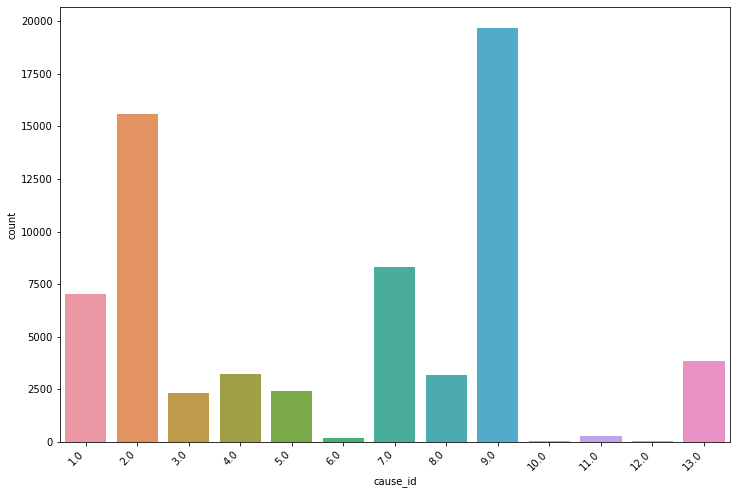

In [25]:
print("------ FIRE CAUSE: ------")
plt.figure(figsize=(12,8))
chart=sns.countplot(x="cause_id", data=df_bal)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

DESCRIPTION

{9: 'Miscellaneous',
 1: 'Lightning',
 5: 'Debris Burning',
 4: 'Campfire',
 2: 'Equipment Use',
 8: 'Children',
 7: 'Arson',
 3: 'Smoking',
 6: 'Railroad',
 10: 'Fireworks',
 12: 'Structure',
 11: 'Powerline',
 13: 'Missing/Undefined'}

In [26]:
human_error_dic={9: 0, 1: 0, 5: 0, 4: 1, 2: 1, 8: 1, 7: 1, 3: 1, 6: 0, 10: 1, 12: 0, 11: 0, 13: 0}
#1=yes
#0=no



In [27]:
df_bal["human_error"]=df_bal["cause_id"].apply(lambda x: human_error_dic[x])

In [28]:
infrastructure_dic={9: 0, 1: 0, 5: 1, 4: 0, 2: 0, 8: 0, 7: 0, 3: 0, 6: 1, 10: 0, 12: 1, 11: 1, 13: 0}

#1=yes
#0=no

In [29]:
df_bal["infrastructure_error"]=df_bal["cause_id"].apply(lambda x: infrastructure_dic[x])


In [30]:
lightning_dic={9: 0, 1: 1, 5: 0, 4: 0, 2: 0, 8: 0, 7: 0, 3: 0, 6: 0, 10: 0, 12: 0, 11: 0, 13: 0}



In [31]:
df_bal["lightning"]=df_bal["cause_id"].apply(lambda x: lightning_dic[x])

In [32]:
df_bal.drop(["cause_id","date","h3_level_4", "fire_date"],axis=1,inplace=True)

In [33]:
df_bal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66132 entries, 7946 to 170366
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fire_size             66132 non-null  int64  
 1   avgTemp               66132 non-null  float64
 2   avgPerc               66132 non-null  float64
 3   avgWind               66132 non-null  float64
 4   month                 66132 non-null  int64  
 5   q_avg_temp            66132 non-null  float64
 6   y_avg_temp            66132 non-null  float64
 7   q_sum_perc            66132 non-null  float64
 8   urban_areas           66132 non-null  int64  
 9   lat                   66132 non-null  float64
 10  lng                   66132 non-null  float64
 11  weekday               66132 non-null  int64  
 12  human_error           66132 non-null  int64  
 13  infrastructure_error  66132 non-null  int64  
 14  lightning             66132 non-null  int64  
dtypes: float64(8), 

# Automated feature importance

In [119]:
#-- 1 --
#X-Y-SPLIT
Y=df_bal["fire_size"]
X=df_bal.drop(["fire_size","urban_areas","weekday","human_error","infrastructure_error","lightning"],axis=1)


In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

def Autofeature(X,Y,scaler=StandardScaler(), model=RandomForestRegressor()):    # RandomForestClassifier()  or RandomForestRegressor() for Modell
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import RandomForestRegressor
    from matplotlib import pyplot
    #scaling
    scaler_x = scaler.fit(X)
    X_scaled = pd.DataFrame(scaler_x.transform(X),columns=X.columns, index=X.index)
    #upsampling
    X, y = balance (X_scaled, Y, "TomekLinks")
    Xs_scaled, ys = balance (X, y, "SMOTE")
     

    model.fit(Xs_scaled, ys)
    # get importance
    importance = model.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))

    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

Before sampling:
Length X:  3636172
Length Y:  3636172
_______________
fire_size
1            909043
2            909043
3            909043
4            909043
dtype: int64
_______________
After sampling:
fire_size
2            909043
3            909043
4            909043
1            908851
dtype: int64
3635980
Before sampling:
Length X:  3635980
Length Y:  3635980
_______________
fire_size
2            909043
3            909043
4            909043
1            908851
dtype: int64
_______________
After sampling:
fire_size
1            909043
2            909043
3            909043
4            909043
dtype: int64
3636172
Feature: 0, Score: 0.15543
Feature: 1, Score: 0.09635
Feature: 2, Score: 0.12809
Feature: 3, Score: 0.05721
Feature: 4, Score: 0.11470
Feature: 5, Score: 0.11623
Feature: 6, Score: 0.13389
Feature: 7, Score: 0.10015
Feature: 8, Score: 0.09794


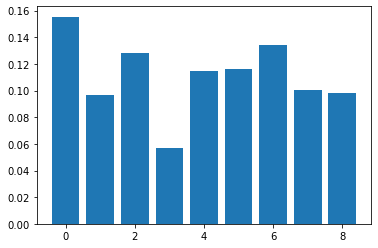

In [121]:
Autofeature(X,Y,scaler=StandardScaler(), model=RandomForestClassifier())

In [106]:
X

,avgTemp,avgPerc,avgWind,month,q_avg_temp,y_avg_temp,q_sum_perc,urban_areas,lat,lng,weekday,human_error,infrastructure_error,lightning
index_fires,,,,,,,,,,,,,,
53872,36.3434,0.000000,2.900000,10,35.745901,35.745901,29447.866667,1,33.743320,-116.392064,0,0,0,0
150900,36.5135,5.700000,2.350000,7,36.572984,36.572984,53526.671429,1,33.969092,-117.246454,4,0,0,0
170538,34.8374,62.466667,1.000000,7,34.742971,34.742971,81367.533333,0,38.350812,-119.762726,1,0,0,1
130727,36.0122,6.787500,2.540000,7,35.966615,35.966615,11126.350000,1,32.919019,-116.729287,3,1,0,0
39217,35.1059,2.850000,2.533333,6,35.105441,35.105441,10301.400000,1,32.505640,-116.895902,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38044,35.1374,8.400000,2.650000,4,35.299703,35.299703,111090.000000,1,32.505640,-116.895902,0,1,0,0
147718,35.2103,48.650000,2.200000,9,35.212822,35.212822,15820.100000,0,37.652150,-119.564497,3,0,0,1
5955,35.2949,3.100000,2.900000,6,35.250399,35.250399,10255.000000,0,41.173242,-123.440375,6,0,0,1


In [56]:
#-- 1 --
#X-Y-SPLIT
Y=df_bal["fire_size"]
X=df_bal.drop(["fire_size","urban_areas","weekday","month","human_error","infrastructure_error","lightning"],axis=1)


In [57]:
#-- 2 --
#TRAIN-TEST-SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)


In [58]:
#-- 3 --
#SCALING
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
#transformer on X_train
transformer = StandardScaler().fit(X_train)
#X-train & X-test Scaling on same transformer
X_train_scaled= pd.DataFrame(transformer.transform(X_train), columns = X.columns, index = X_train.index)
X_test_scaled= pd.DataFrame(transformer.transform(X_test), columns = X.columns, index = X_test.index)


The accuracy of the model in the TRAIN set is:  0.49
The kappa of the model in the TRAIN set is:  0.2315004229631652
________________________TRAIN_______________________________________
              precision    recall  f1-score   support

           1       0.54      0.42      0.47     15607
           2       0.46      0.46      0.46     15145
           3       0.48      0.58      0.53     15540

    accuracy                           0.49     46292
   macro avg       0.49      0.49      0.49     46292
weighted avg       0.49      0.49      0.49     46292

The accuracy of the model in the TEST set is:  0.48
The kappa of the model in the TEST set is:  0.21831877692967983
________________________TEST_______________________________________
              precision    recall  f1-score   support

           1       0.53      0.41      0.46      6689
           2       0.44      0.44      0.44      6395
           3       0.48      0.58      0.53      6756

    accuracy                   

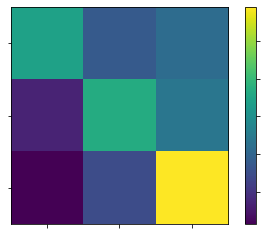

In [66]:
#-- 5 --
#MODELING
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

model= RandomForestClassifier(n_estimators=1000,max_depth=11, min_samples_split=2000, min_samples_leaf=900)
#model=AdaBoostClassifier()
classification=model.fit(X_train_scaled, y_train)

y_train_sampled_pred = classification.predict(X_train_scaled)
y_train_sampled_pred_df = pd.DataFrame(y_train_sampled_pred,index=y_train.index,columns=["fire"])

y_test_pred = classification.predict(X_test_scaled)
probability = classification.predict_proba(X_test_scaled)
y_test_pred_df = pd.DataFrame(y_test_pred,index=y_test.index,columns=["fire" + "_pred"])


#-- 6 --
#ERROR-MATRIX
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

print("The accuracy of the model in the TRAIN set is: ", round(classification.score(X_train_scaled, y_train),2))
print("The kappa of the model in the TRAIN set is: ", cohen_kappa_score(y_train,y_train_sampled_pred))

print("________________________TRAIN_______________________________________")
print(classification_report(y_train, y_train_sampled_pred))

print("The accuracy of the model in the TEST set is: ", round(classification.score(X_test_scaled,y_test),2))
print("The kappa of the model in the TEST set is: ", cohen_kappa_score(y_test,y_test_pred))

print("________________________TEST_______________________________________")
print(classification_report(y_test, y_test_pred))

#-- 7 --
#CONF-MATRIX
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

print("The values are:")
print(confusion_matrix(y_test, y_test_pred_df))

plot_confusion_matrix(classification, X_test_scaled, y_test)
plt.show()

In [46]:
#-- 1 --
#X-Y-SPLIT
Y1=df_bal["fire_size"]
X1=df_bal.drop(["fire_size","urban_areas","weekday","month","human_error","infrastructure_error","lightning"],axis=1)


In [47]:
#-- 2 --
#TRAIN-TEST-SPLIT
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=100)


In [48]:
from sklearn.metrics import make_scorer

ftwo_scorer = make_scorer(cohen_kappa_score)

In [54]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
# Perform Grid-Search
gsc = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        
        'max_depth': range(5,8),
        'n_estimators': [150,250, 500]
    },
     cv=5, scoring=ftwo_scorer, verbose=1,
n_jobs=1)

grid_result = gsc.fit(X1_train, y1_train)
best_params = grid_result.best_params_


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  3.6min finished


In [55]:
best_params 

{'max_depth': 7, 'n_estimators': 250}

In [64]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
# Perform Grid-Search
gsc = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        
        'max_depth': range(5,12),
        'n_estimators': [1000, 2500, 5000]
    },
     cv=5, scoring=ftwo_scorer, verbose=1,
n_jobs=1)

grid_result = gsc.fit(X1_train, y1_train)
best_params = grid_result.best_params_


Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed: 96.0min finished


In [65]:
best_params

{'max_depth': 11, 'n_estimators': 1000}

In [134]:
#-- 3 --
#SCALING
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
#transformer on X_train
transformer = StandardScaler().fit(X_train)
#X-train & X-test Scaling on same transformer
X1_train_scaled= pd.DataFrame(transformer.transform(X1_train), columns = X.columns, index = X_train.index)
X1_test_scaled= pd.DataFrame(transformer.transform(X1_test), columns = X.columns, index = X_test.index)


In [136]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='ovr')
model.fit(X1_train_scaled, y1_train)

yhat = model.predict(X1_train_scaled)

In [137]:
classification1= model

y1_train_sampled_pred = yhat
y1_train_sampled_pred_df = pd.DataFrame(y1_train_sampled_pred,index=y1_train.index,columns=["fire"])

y1_test_pred = classification1.predict(X1_test_scaled)
probability = classification1.predict_proba(X1_test_scaled)
y1_test_pred_df = pd.DataFrame(y1_test_pred,index=y1_test.index,columns=["fire" + "_pred"])


The accuracy of the model in the TRAIN set is:  0.44
The kappa of the model in the TRAIN set is:  0.09437553118755926
________________________TRAIN_______________________________________
              precision    recall  f1-score   support

           1       0.35      0.33      0.34    636326
           2       0.28      0.18      0.22    636362
           3       0.32      0.35      0.33    636098
           4       0.32      0.42      0.36    636534

    accuracy                           0.32   2545320
   macro avg       0.32      0.32      0.31   2545320
weighted avg       0.32      0.32      0.31   2545320

The accuracy of the model in the TEST set is:  0.32
The kappa of the model in the TEST set is:  0.09478584023087044
________________________TEST_______________________________________
              precision    recall  f1-score   support

           1       0.36      0.33      0.34    272717
           2       0.28      0.18      0.22    272681
           3       0.32      0.

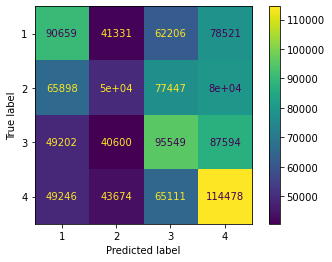

In [138]:
#-- 6 --
#ERROR-MATRIX
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

print("The accuracy of the model in the TRAIN set is: ", round(classification.score(X1_train_scaled, y1_train),2))
print("The kappa of the model in the TRAIN set is: ", cohen_kappa_score(y1_train,y1_train_sampled_pred))

print("________________________TRAIN_______________________________________")
print(classification_report(y1_train, y1_train_sampled_pred))

print("The accuracy of the model in the TEST set is: ", round(classification1.score(X1_test_scaled,y1_test),2))
print("The kappa of the model in the TEST set is: ", cohen_kappa_score(y1_test,y1_test_pred))

print("________________________TEST_______________________________________")
print(classification_report(y1_test, y1_test_pred))

#-- 7 --
#CONF-MATRIX
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

print("The values are:")
print(confusion_matrix(y1_test, y1_test_pred_df))

plot_confusion_matrix(classification1, X1_test_scaled, y1_test)
plt.show()

In [141]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

model = LogisticRegression()
ovr = OneVsRestClassifier(model)
ovr.fit(X1_train_scaled, y1_train)

yhat = model.predict(X1_train_scaled)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
classification1= model

y1_train_sampled_pred = yhat
y1_train_sampled_pred_df = pd.DataFrame(y1_train_sampled_pred,index=y1_train.index,columns=["fire"])

y1_test_pred = classification1.predict(X1_test_scaled)
probability = classification1.predict_proba(X1_test_scaled)
y1_test_pred_df = pd.DataFrame(y1_test_pred,index=y1_test.index,columns=["fire" + "_pred"])


In [ ]:
#-- 6 --
#ERROR-MATRIX
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

print("The accuracy of the model in the TRAIN set is: ", round(classification.score(X1_train_scaled, y1_train),2))
print("The kappa of the model in the TRAIN set is: ", cohen_kappa_score(y1_train,y1_train_sampled_pred))

print("________________________TRAIN_______________________________________")
print(classification_report(y1_train, y1_train_sampled_pred))

print("The accuracy of the model in the TEST set is: ", round(classification1.score(X1_test_scaled,y1_test),2))
print("The kappa of the model in the TEST set is: ", cohen_kappa_score(y1_test,y1_test_pred))

print("________________________TEST_______________________________________")
print(classification_report(y1_test, y1_test_pred))

#-- 7 --
#CONF-MATRIX
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

print("The values are:")
print(confusion_matrix(y1_test, y1_test_pred_df))

plot_confusion_matrix(classification1, X1_test_scaled, y1_test)
plt.show()

In [130]:
categories=list(df_bal["fire_size"].unique())
categories

[1, 2, 3, 4]

In [ ]:
from sklearn.linear_model import LogisticClassification
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier# Using pipeline for applying logistic regression and one vs rest classifier


LogClas_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticClassification(solver='sag'), n_jobs=-1)),
            ])



for category in categories:
    print('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogClas_pipeline.fit(X1_train, y1_train)
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(X1_test)
    print('Test accuracy is {}'.format(accuracy_score(y1_test, prediction)))
    print("\n")
    print('Test kappa is {}'.format(cohen_kappa_score(y1_test, prediction)))
    print("\n")

In [ ]:
# define the model
model = Sequential()
model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(n_outputs, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')